# PTI-Clima Notebooks  <img src="https://www.r-project.org/logo/Rlogo.png" alt="Description" width="60" height="40">

***

> Este cuaderno o notebook muestra las operaciones básicas para comenzar a trabajar con los conjuntos de datos de la PTI-Clima que se incluyen en el [almacén de datos](https://pti.climate.ifca.es/data). Este trabajo está licenciado bajo una [Licencia Creative Commons Atribución 4.0 Internacional](http://creativecommons.org/licenses/by/4.0).
>
> ![Licencia de Creative Commons](https://i.creativecommons.org/l/by/4.0/88x31.png)


## Intercomparación de rejillas observacionales

**M. Iturbide** (Instituto de Física de Cantabria, CSIC-Universidad de Cantabria, Santander, Spain).

**¡Bienvenidos al notebook de *Proyecciones CORDEX* de la Plataforma Virtual de Cálculo de la PTI-Clima!**  
Esta guía está diseñada para ayudarte a sacar el máximo provecho de los numerosos recursos disponibles en el [**Almacén de Datos de la PTI-Clima**](https://pti.climate.ifca.es/data). A través de esta plataforma, podrás realizar investigaciones y **análisis climáticos de relevancia**, ya que ofrece **acceso transparente a una amplia gama de materiales y datos** subyacentes a los **servicios climáticos desarrollados en la PTI-Clima**, fomentando su **reutilización** y posibilitando la **reproducibilidad** de los productos generados.

En el directorio principal encontrarás el notebook de [**primeros_pasos_R.ipynb**](../../primeros_pasos_R.ipynb) que describe el **objetivo general y la motivación** detrás de esta plataforma virtual, aclarando su propósito y relevancia en el ámbito de la investigación climática. Además, describe el material disponible, brindándote una visión de los diversos conjuntos de datos y recursos a tu disposición para el análisis climático. Finalmente, ilustra **los pasos fundamentales para comenzar a trabajar de manera efectiva con datos climáticos**. 

Esta plataforma cuenta con **software preinstalado y listo para usar** para gestionar y realizar operaciones con datos climáticos. Este software consiste en un conjunto de **paquetes de R**, conocido como el **framework `climate4R`** (Iturbide et al., 2019. DOI: [10.1016/j.envsoft.2018.09.009](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub)), que puede seleccionarse desde el menú de kernel. Para más información, visita [el repositorio de climate4R en GitHub](https://github.com/SantanderMetGroup/climate4R).

<img src="https://raw.githubusercontent.com/SantanderMetGroup/climate4R/refs/heads/devel/man/figures/climate4R_logo.svg" alt="Description" width="60" height="40">

***climate4R*** ofrece más funcionalidades de las que se ilustran en este notebook, como **funcionalidades de operaciones espaciales y temporales** o como **interpolación, subsetting o intersección espacial**. Además, brinda funcionalidades para la **corrección de sesgo y downscaling**. Consulta [Iturbide et al., 2019](https://www.sciencedirect.com/science/article/pii/S1364815218303049?via%3Dihub) y el repositorio de [github de climate4R](https://github.com/SantanderMetGroup/climate4R) para más información.

Para usuarios de Python, también se dispone de un entorno **`python 3`**. Es importante señalar, no obstante, que en este caso el software preinstalado es más básico.


### Contenido de este cuaderno
1) Carga de librerías
2) Selección de conjuntos de datos  
3) Carga de datos
4) Cálculo de la señal de cambio climático

Antes de empezar definiremos el heap space de java.

In [1]:
options(java.parameters = "-Xmx20g")

Antes de empezar, o en cualquier momento durante el cuaderno, podemos personalizar el área de visualización de gráficos de la siguiente manera:

In [2]:
library(repr)
# Change plot size 
options(repr.plot.width=8, repr.plot.height=5)

***

### 1. Carga de librerías

Las librerías/paquetes centrales de ***climate4R*** que permiten **cargar y transformar** datos (p. ej., agregaciones espaciotemporales) y **visualizarlos** son `loadeR`, `transformeR` y `visualizeR`.

In [3]:
library(loadeR)
library(transformeR)
library(visualizeR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 22x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.



Sin embargo, el software incluye todo el framework *climate4R* y otras bibliotecas útiles. Por ejemplo, incluye la potente biblioteca de gráficos `lattice` o la biblioteca `magrittr` para operaciones en tuberías (a través de `%>%`).

In [4]:
library(lattice)
library(magrittr)

### 2. Selección de conjuntos de datos

El inventario (`data_inventory.csv`) cataloga la lista de archivos del [**Almacén de datos de la PTI-Clima**](https://pti.climate.ifca.es/data).

Simplemente necesitamos leer este archivo con la función `read.csv` para obtener el `data.frame` con esta información.

In [5]:
df <- read.csv("../../data_inventory.csv")

In [6]:
str(df)

'data.frame':	120 obs. of  9 variables:
 $ dataset   : chr  "AEMET-5KM-regular_Iberia_day" "CHELSA-W5E5v1.0_Canarias_day" "CHELSA-W5E5v1.0_Iberia_day" "PTI-grid-v0_Canarias_day" ...
 $ type      : chr  "observations" "observations" "observations" "observations" ...
 $ access    : chr  "opendap" "opendap" "opendap" "opendap" ...
 $ source    : chr  "AEMET-5KM-regular" "CHELSA-W5E5v1.0" "CHELSA-W5E5v1.0" "PTI-grid-v0" ...
 $ provider  : chr  "" "" "" "" ...
 $ experiment: chr  "" "" "" "" ...
 $ frequency : chr  "day" "day" "day" "day" ...
 $ endpoint  : chr  "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml" "https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml" ...
 $ dictionary: chr  "../../Har

Podremos ver las primeras filas del `data.frame` resultande con la función `head`.

In [7]:
head(df)

,dataset,type,access,source,provider,experiment,frequency,endpoint,dictionary
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AEMET-5KM-regular_Iberia_day,observations,opendap,AEMET-5KM-regular,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/AEMET-5KM-regular_Iberia_day.ncml,../../Harmonization_dictionaries/AEMET-5KM-regular.dic
2,CHELSA-W5E5v1.0_Canarias_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Canarias_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
3,CHELSA-W5E5v1.0_Iberia_day,observations,opendap,CHELSA-W5E5v1.0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/CHELSA-W5E5v1.0_Iberia_day.ncml,../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic
4,PTI-grid-v0_Canarias_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Canarias_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
5,PTI-grid-v0_Iberia_day,observations,opendap,PTI-grid-v0,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v0_Iberia_day.ncml,../../Harmonization_dictionaries/PTI-grid-v0.dic
6,PTI-grid-v1_Canarias_day,observations,opendap,PTI-grid-v1,,,day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/observations/PTI-grid-v1_Canarias_day.ncml,../../Harmonization_dictionaries/PTI-grid-v1.dic


Se observan diferentes columnas o campos que describen los datos:

* `dataset` se refiere al nombre que se le da a cada instancia de datos en el almacén.
* `type` se refiere al tipo de los conjuntos de datos, ya sea "observaciones" (observations), "reanalisis" (reanalysis) o proyecciones (projections).
* `source` se refiere al conjuntos de datos de origen (p. ej., CORDEX-EUR, CMIP5, CMIP6, etc.).  
* `provider` se refiere a la entidad distribuidora de donde se obtuvieron los datos originales.  
* `access` se refiere al modo de acceso, ya sea local (netcdf) o remoto (opendap).
* `experiment` se refiere al escenario (p. ej., historical, rcp26, ssp126, rcp85, etc.).
* `frequency` se refiere a la escala temporal de los datos.
* `endpoint` se refiere a la ruta del archivo de datos. Esta ruta es la que se utilizará para cargar los datos más adelante.
* `dictionary` se refiere al archivo que determina el tipo de conversiones necesarias (unidades y nombre de variable) para cargar los datos de manera armonizada, independientemente de las características diferenciadas de los datasets en origen.

Podemos **aplicar fácilmente filtros** para obtener el archivo deseado. El objetivo de este notebook es analizar las proyecciones de CORDEXbc (bias corrected), por lo tanto, filtraremos el catálogo de datos por tipo (`source`). También filtraremos por `experiment`. Nos quedaremos con el nombre del `dataset`, el `endpoint` y el `dictionary`.

In [8]:
datasets.hist <- subset(df, source == "CORDEX" & experiment == "historical")[c("dataset", "endpoint", "dictionary")]
datasets.rcp85 <- subset(df, source == "CORDEX" & experiment == "rcp85")[c("dataset", "endpoint", "dictionary")]

En este caso, optaremos por la región de España peninsular y Baleares. Estos son los datasets que contienen `Iberia` en su nombre.

In [9]:
head(datasets.hist)
head(datasets.rcp85)

,dataset,endpoint,dictionary
,<chr>,<chr>,<chr>
8,CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
10,CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_historical_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
12,CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_historical_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
15,CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_historical_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
18,CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_historical_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
21,CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_historical_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_historical_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic


,dataset,endpoint,dictionary
,<chr>,<chr>,<chr>
9,CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_rcp85_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_ICHEC-EC-EARTH_rcp85_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
11,CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_rcp85_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom-ETH_NCC-NorESM1-M_rcp85_CLMcom-ETH-COSMO-crCLIM-v1-1_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
14,CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_rcp85_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_CNRM-CERFACS-CNRM-CM5_rcp85_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
17,CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_rcp85_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_ICHEC-EC-EARTH_rcp85_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
20,CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_rcp85_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MOHC-HadGEM2-ES_rcp85_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic
23,CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_rcp85_CLMcom-CCLM4-8-17_v1_day,https://data.meteo.unican.es/thredds/dodsC/PTI-clima/projections/spain/CORDEXbc_output_EUR-11_CLMcom_MPI-M-MPI-ESM-LR_rcp85_CLMcom-CCLM4-8-17_v1_day.ncml,../../Harmonization_dictionaries/CORDEXbc.dic


El resultado son múltiples datasets para cada uno de los experimentos, ya que CORDEX se compone de **múltiples datasets correspondientes a diferentes combinaciones GCM-RCM**.

Una vez que tenemos los datasets y sus `endpoint`, podemos mostrar fácilmente las características de los datos que contienen. Para hacerlo, empleamos la función `dataInventory` del paquete `loadeR`. Por ejemplo, para el primero de los datasets.

In [10]:
di <- dataInventory(datasets.hist$endpoint[1])

[2025-01-17 18:37:09.810096] Doing inventory ...

[2025-01-17 18:37:09.964856] Opening dataset...

[2025-01-17 18:37:20.018689] The dataset was successfuly opened

[2025-01-17 18:37:21.002225] Retrieving info for 'pr' (4 vars remaining)

[2025-01-17 18:37:21.206386] Retrieving info for 'tas' (3 vars remaining)

[2025-01-17 18:37:21.274273] Retrieving info for 'tasmax' (2 vars remaining)

[2025-01-17 18:37:21.378303] Retrieving info for 'tasmin' (1 vars remaining)

[2025-01-17 18:37:21.443002] Retrieving info for 'tasrange' (0 vars remaining)

[2025-01-17 18:37:21.508899] Done.



Podemos echar un primer vistazo a la información disponible con `str`.

In [11]:
str(di)

List of 5
 $ pr      :List of 7
  ..$ Description: NULL
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 20454 170 273
  ..$ Units      : chr "mm"
  ..$ DataSizeMb : num 3797
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1950-01-01"
  .. .. ..$ Date_range: chr "1950-01-01T00:00:00Z - 2005-12-31T00:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:170] 35.3 35.3 35.4 35.4 35.5 ...
  .. .. ..$ Shape      : int 170
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:273] -9.32 -9.27 -9.22 -9.17 -9.12 ...
  .. .. ..$ Shape      : int 273
  .. .. ..$ Coordinates: chr "lon"
 $ tas     :List of 7
  ..$ Description: NULL
  ..$ Dat

Vemos que, para este dataset, hay cinco variables disponibles: pr, tas, tasmax, tasmin y tasrange. Para cada una de ellas se detalla información adicional, como las unidades,el periodo temporal que cubren, las coordenadas etc.

### 3. Carga de datos


La carga de datos se realiza mediante la **función `loadGridData`** especificando, como fuente de datos, la ruta de un archivo NetCDF o de un catálogo NcML. En nuestro caso, estas rutas son precisamente las que encapsulan los objetos que hemos definido anteriormente (`datasets.hist` y `datasets.rcp85`) en la columna **`endpoint`**.

También **es necesario especificar el parámetro `var`**, que en este ejemplo se establece como `tasmax` (temperatura superficial maxima). Ten en cuenta que **`loadGridData` permite establecer parámetros adicionales**. Por ejemplo, podríamos utilizar los parámetros `lonLim` y `latLim` para cargar únicamente el subconjunto de datos correspondiente a una región más pequeña. Si no se emplean estos parámetros se carga el dominio completo (como en este caso). Otro parámetro útil es `season`, para cargar datos de meses específicos (en este ejemplo, Agosto). En el parámetro `years`, especificamos el periodo deseado (en este caso, 1986-2005 para el experimento histórico y 2041-2060 para el RCP85). **El parámetro que habilita la carga de datos armonizados es `dictionary`**. **Para obtener detalles sobre el funcionamiento de los diccionarios, puedes consultar el notebook `primeros_pasos_R.ipynb`**.

Dado que CORDEX se compone de múltiples datasets correspondientes a diferentes combinaciones GCM-RCM, podemos proceder de manera eficiente, **automatizando la carga en un bucle**. Ten en cuenta que **esta operación puede tardar minutos**, ya que estamos cargando una gran cantidad de datos. Puedes guardar el objeto generado para evitar repetir esta operación en el futuro. Por ese motivo se incluye un `if` que comprueba si el objeto está creado anteriormente, y ejecuta la carga únicamente si el objeto no está en la ruta indicada (puedes modificar la ruta de `resulting.object.path`). 

Dado que cargar múltiples modelos/miembros de CORDEX (es decir, múltiples datasets) para un periodo de varios años ocupa mucha memoria, intentaremos reducir la carga sin comprometer los objetivos del análisis. En nuestro caso, no necesitamos el dato diario, así que **realizaremos la agregación mensual en el momento de la carga** con el arguento `aggr.m`, extrayendo el máximo de la temperatura máxima de cada mes.

Además, **en el mismo bucle de carga realizaremos la unión en un grid multi-miembro**. Para ver ejemplos ilustrativos más sencillos, donde se realicen estas operaciones paso a paso, puedes consultar los notebooks **`primeros_pasos_R.ipynb`** y **`intercomp_rejillas_obs_R.ipynb`**.

Primero cargaremos los datos históricos.

In [12]:
resulting.object.path <- "../../../tasmax.jja.cdx.hist.rds"

if (!file.exists(resulting.object.path)) {
    
    tasmax.jja.cdx.hist <- lapply(datasets.hist$dataset, function(d) {
        dataset.i <- d
        endpoint.i <- subset(datasets.hist, dataset == dataset.i)[["endpoint"]]
        dic.i <- subset(datasets.hist, dataset == dataset.i)[["dictionary"]]
        message("proccessing...", d)
        loadGridData(dataset = endpoint.i,
                               var = "tasmax",
                               season = 8,
                               years = 1986:2005,
                               aggr.m = "max",
                               dictionary = dic.i) %>% suppressMessages %>% suppressWarnings
        
    }) %>% bindGrid(dimension = "member") 
    
    saveRDS(tasmax.jja.cdx.hist, resulting.object.path)
    
} else {
    
    tasmax.jja.cdx.hist <- readRDS(resulting.object.path)
    
}

Ahora cargaremos los datos de proyecciones futuras (RCP85). Para este caso cargaremos el periodo 2041-2060.

In [13]:
resulting.object.path <- "../../../tasmax.jja.cdx.rcp85.rds"

if (!file.exists(resulting.object.path)) {
    
    tasmax.jja.cdx.rcp85 <- lapply(datasets.rcp85$dataset, function(d) {
        dataset.i <- d
        endpoint.i <- subset(datasets.rcp85, dataset == dataset.i)[["endpoint"]]
        dic.i <- subset(datasets.rcp85, dataset == dataset.i)[["dictionary"]]
        message("proccessing...", d)
        loadGridData(dataset = endpoint.i,
                               var = "tasmax",
                               season = 8,
                               years = 2041:2060,
                               aggr.m = "max",
                               dictionary = dic.i) %>% suppressMessages %>% suppressWarnings
    }) %>% bindGrid(dimension = "member")
    
    saveRDS(tasmax.jja.cdx.rcp85, resulting.object.path)
    
} else {
    
    tasmax.jja.cdx.rcp85 <- readRDS(resulting.object.path)
    
}

Comprobamos que hemos cargado los mismos GCM-RCM en los objetos `grid` de los experimentos histórico y RCP85.

In [14]:
modelnames.hist <- strsplit(datasets.hist$dataset, "_") %>% lapply("[", c(5, 7, 8)) %>% lapply(paste, collapse = "_") %>% unlist 
modelnames.rcp85 <- strsplit(datasets.rcp85$dataset, "_") %>% lapply("[", c(5, 7, 8)) %>% lapply(paste, collapse = "_") %>% unlist %>% print

 [1] "ICHEC-EC-EARTH_CLMcom-ETH-COSMO-crCLIM-v1-1_v1"
 [2] "NCC-NorESM1-M_CLMcom-ETH-COSMO-crCLIM-v1-1_v1" 
 [3] "CNRM-CERFACS-CNRM-CM5_CLMcom-CCLM4-8-17_v1"    
 [4] "ICHEC-EC-EARTH_CLMcom-CCLM4-8-17_v1"           
 [5] "MOHC-HadGEM2-ES_CLMcom-CCLM4-8-17_v1"          
 [6] "MPI-M-MPI-ESM-LR_CLMcom-CCLM4-8-17_v1"         
 [7] "CNRM-CERFACS-CNRM-CM5_CNRM-ALADIN63_v2"        
 [8] "MOHC-HadGEM2-ES_CNRM-ALADIN63_v1"              
 [9] "MPI-M-MPI-ESM-LR_CNRM-ALADIN63_v1"             
[10] "NCC-NorESM1-M_CNRM-ALADIN63_v1"                
[11] "CNRM-CERFACS-CNRM-CM5_DMI-HIRHAM5_v2"          
[12] "ICHEC-EC-EARTH_DMI-HIRHAM5_v1"                 
[13] "ICHEC-EC-EARTH_DMI-HIRHAM5_v2"                 
[14] "IPSL-IPSL-CM5A-MR_DMI-HIRHAM5_v1"              
[15] "MOHC-HadGEM2-ES_DMI-HIRHAM5_v2"                
[16] "MPI-M-MPI-ESM-LR_DMI-HIRHAM5_v1"               
[17] "NCC-NorESM1-M_DMI-HIRHAM5_v3"                  
[18] "CNRM-CERFACS-CNRM-CM5_GERICS-REMO2015_v2"      
[19] "IPSL-IPSL-CM5A-MR_GERI

In [15]:
tasmax.jja.cdx.hist$Members <- modelnames.hist
tasmax.jja.cdx.rcp85$Members <- modelnames.rcp85

In [16]:
identical(modelnames.hist, modelnames.rcp85)

[1] TRUE

### 4. Cálculo de la señal de cambio climático

Para calcular la señal de cambio climático que proyectan cada uno de los GCM-RCM, aplicaremos la función `gridArithmetics` a las climatologías.

In [17]:
anom <- gridArithmetics(climatology(tasmax.jja.cdx.rcp85), climatology(tasmax.jja.cdx.hist), operator = "-")

[2025-01-17 18:37:30.653765] - Computing climatology...

[2025-01-17 18:37:51.403095] - Done.

[2025-01-17 18:37:52.139229] - Computing climatology...

[2025-01-17 18:38:11.60712] - Done.



Visualizamos los mapas de la señal de cambio climático para cada GCM-RCM

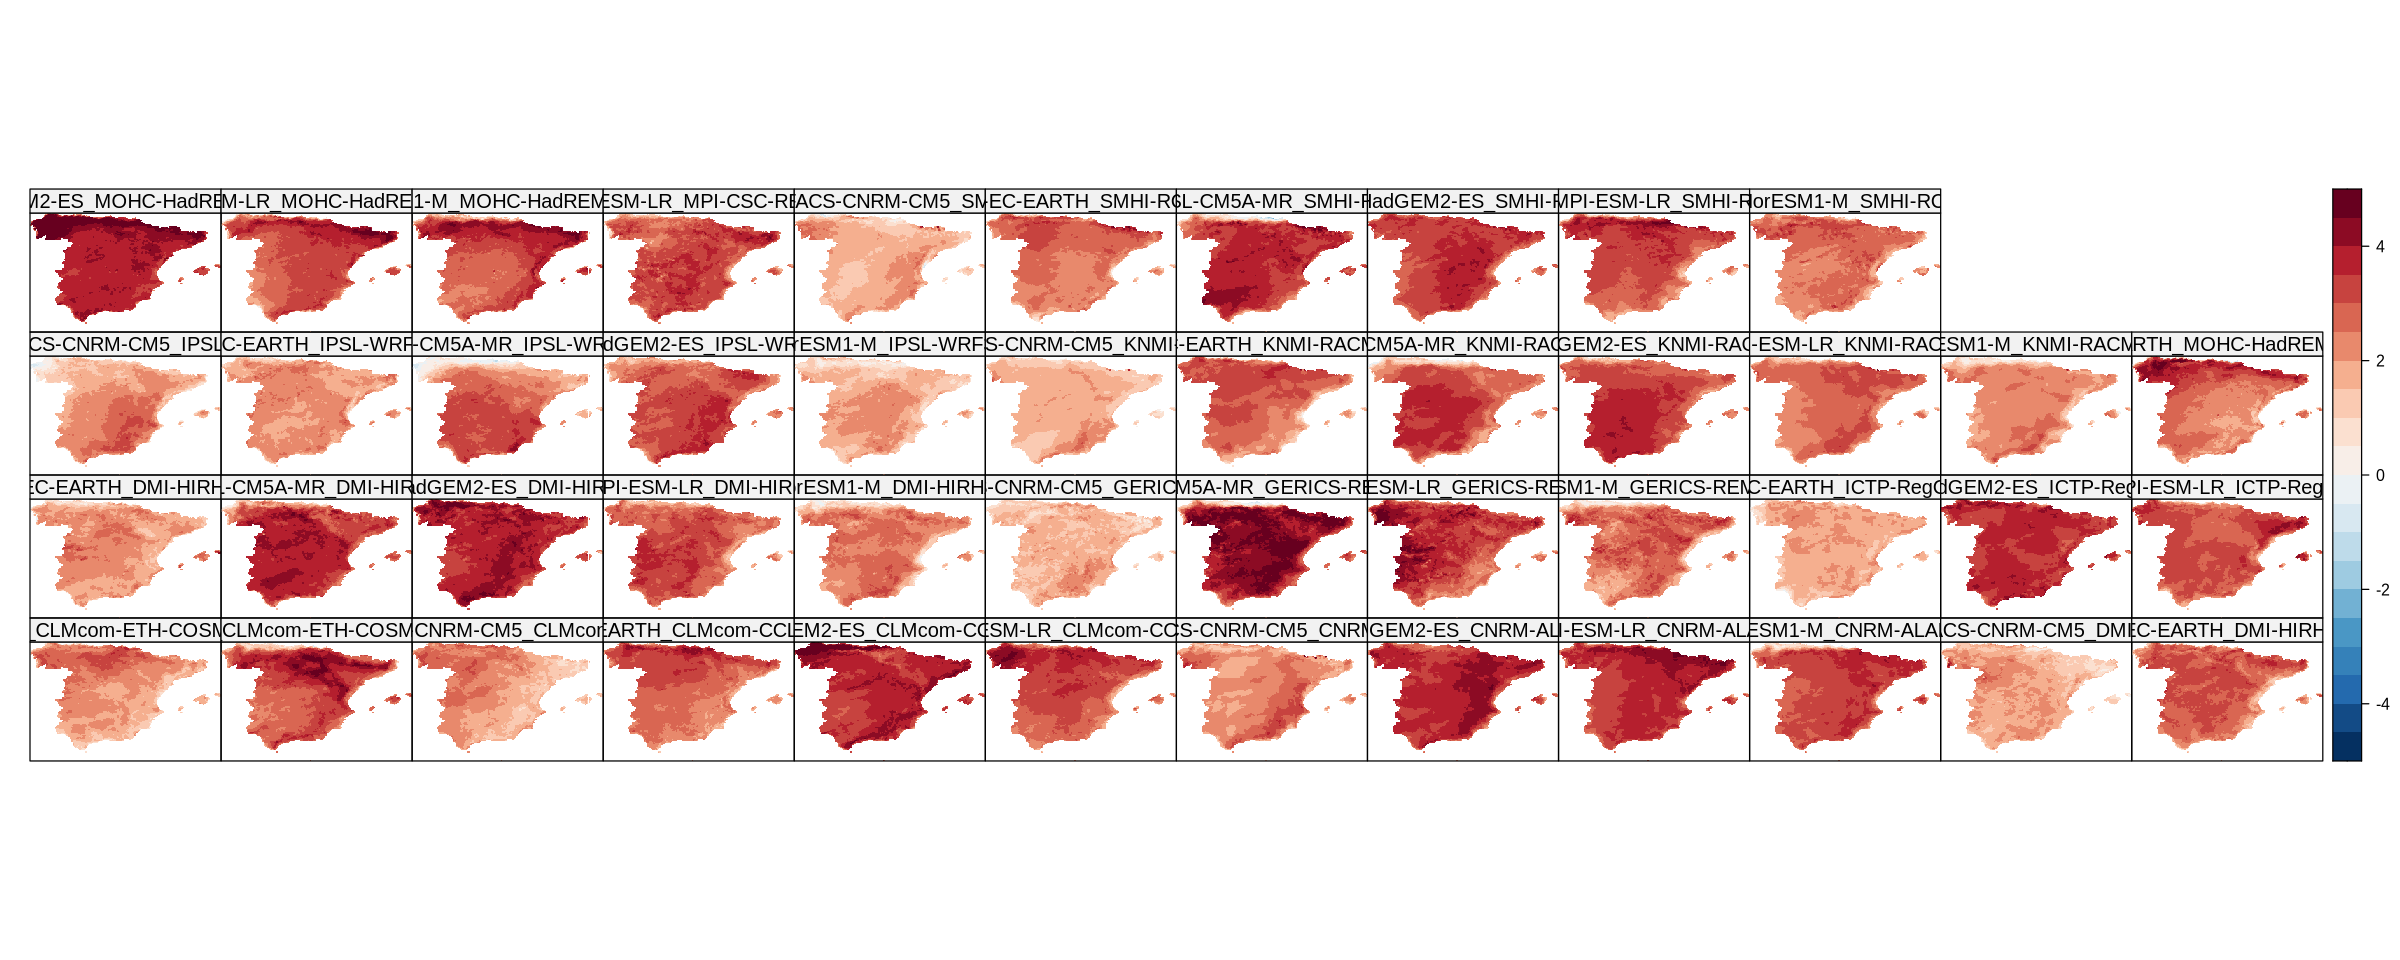

In [18]:
options(repr.plot.width=20, repr.plot.height=8)
spatialPlot(anom, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            at = seq(-5, 5, 0.5),
            set.max = 5,
            set.min = -5,
            layout = c(12, 4),
            strip = strip.custom(factor.levels = anom$Members))

Para calcular la media multi-modelo aplicaremos la función `aggregateGrid` de la siguiente manera.

In [19]:
anom.ens <- aggregateGrid(anom, aggr.mem = list(FUN = "mean", na.rm = T))

[2025-01-17 18:38:20.617378] - Aggregating members...

[2025-01-17 18:38:21.302675] - Done.



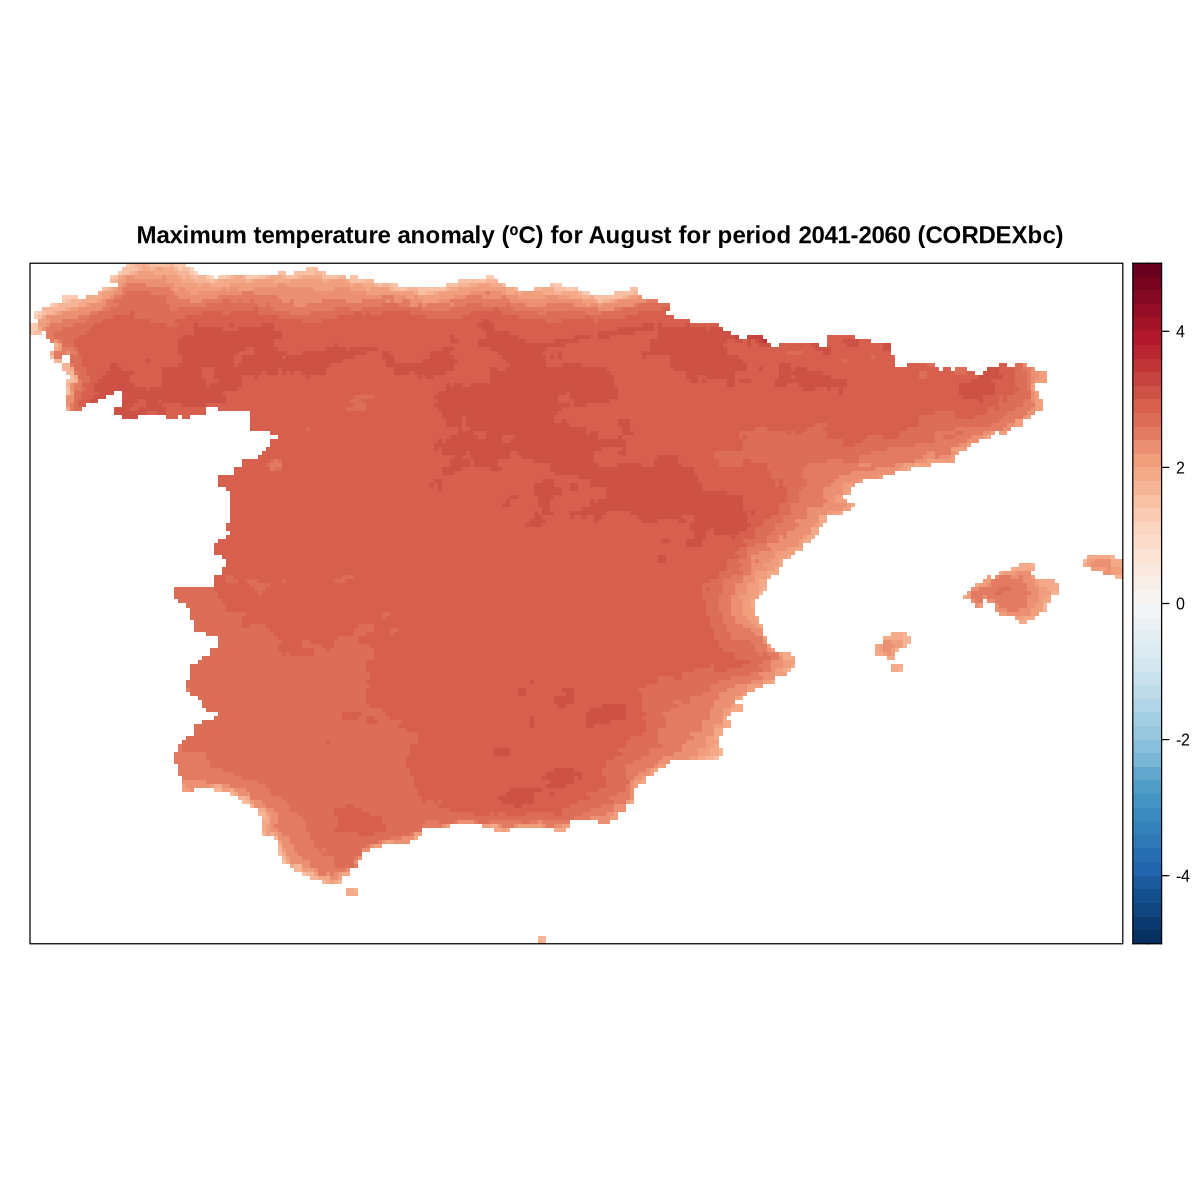

In [20]:
options(repr.plot.width=10, repr.plot.height=10)
spatialPlot(anom.ens, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            at = seq(-5, 5, 0.2),
            set.max = 5,
            set.min = -5,
            main = "Maximum temperature anomaly (ºC) for August for period 2041-2060 (CORDEXbc)")

Visualizamos las series temporales inter-anuales.

pad applied on the interval: year

pad applied on the interval: year



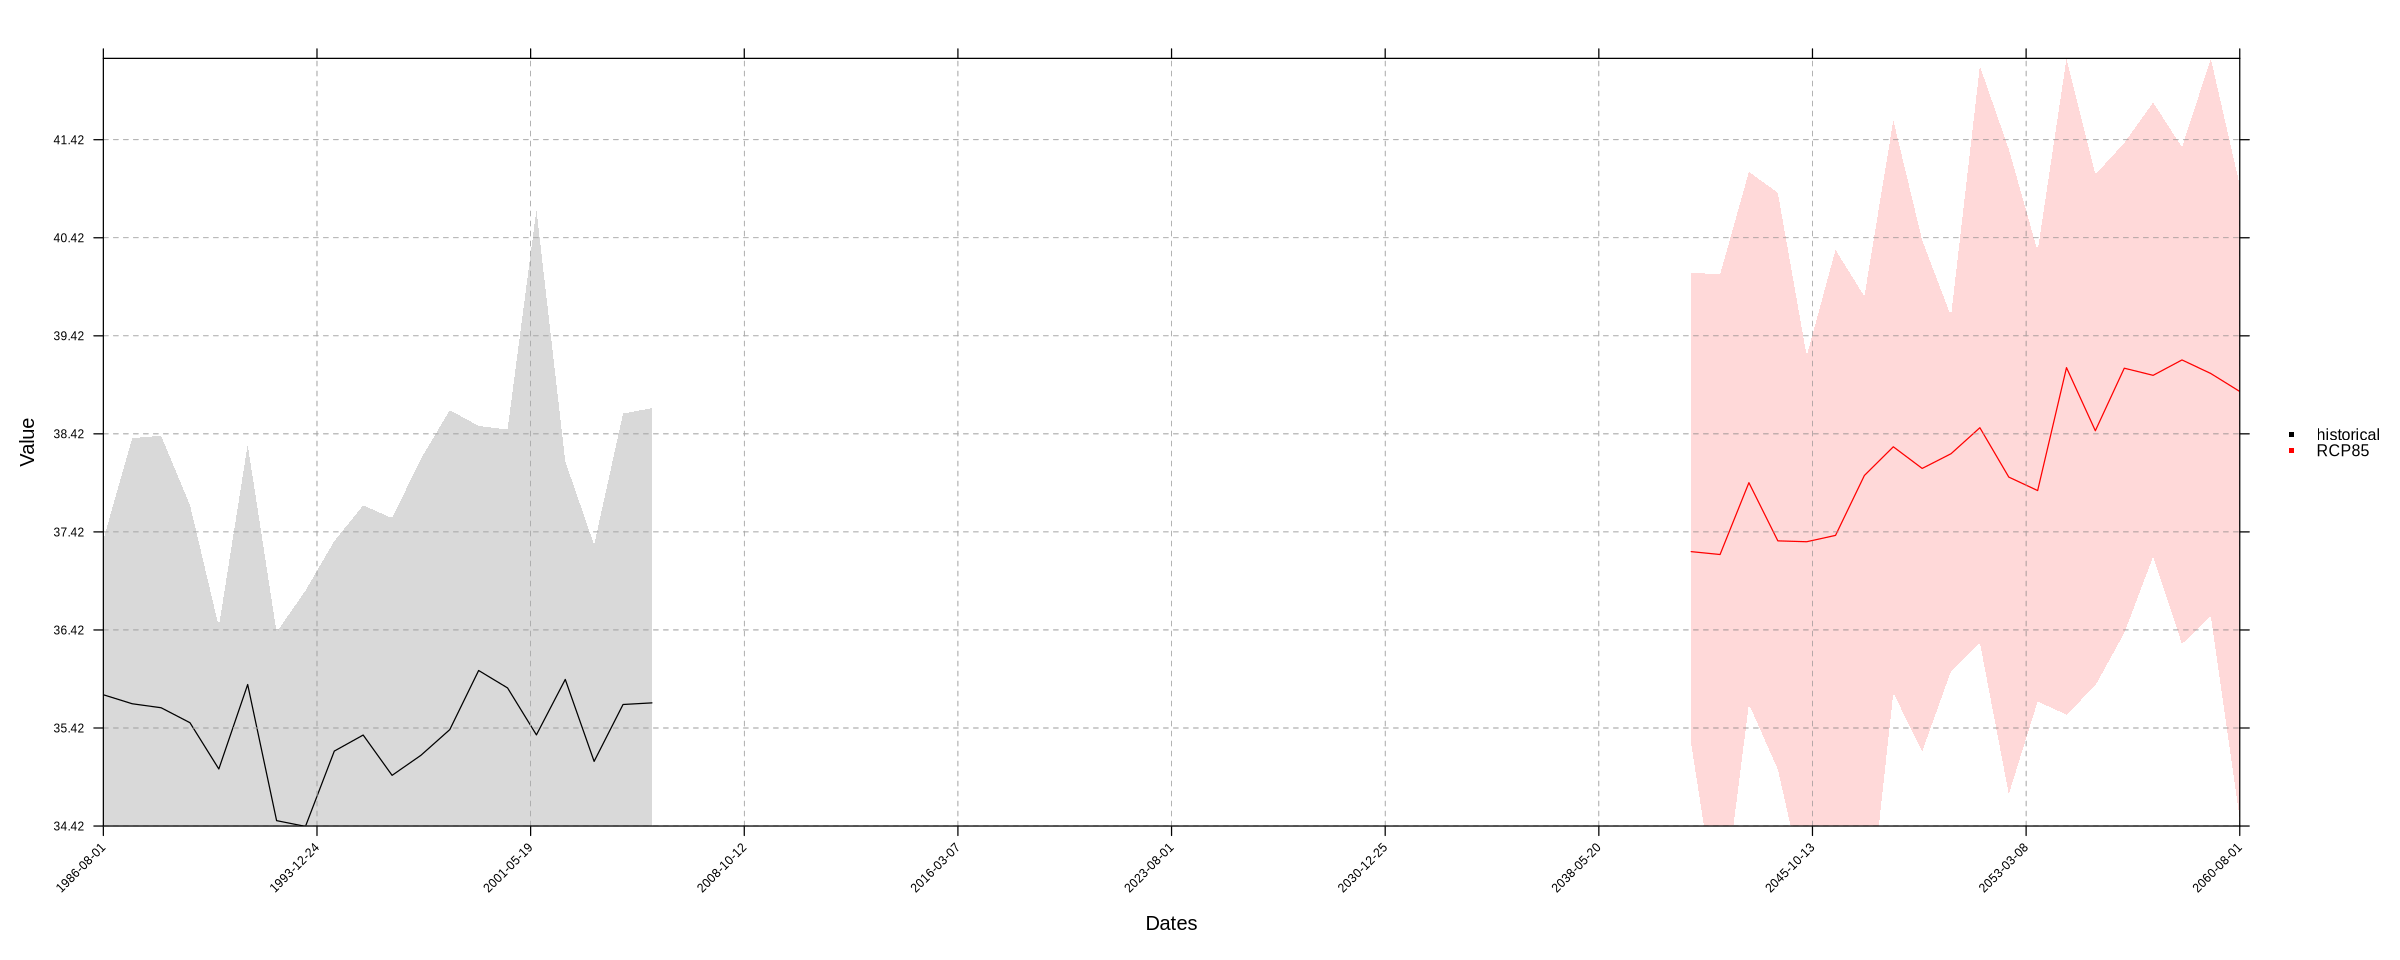

In [23]:
options(repr.plot.width=20, repr.plot.height=8)
temporalPlot("historical" = tasmax.jja.cdx.hist, "RCP85" = tasmax.jja.cdx.rcp85)

***

### Session Info

In [22]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/climate4r/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] magrittr_2.0.3      lattice_0.22-6      visualizeR_1.6.4   
[4] transformeR_2.2.2   loadeR_1.8.1        climate4R.UDG_0.2.6
[7] loadeR.java_1.1.1   rJava_1.0-11        repr_1.1.7         

loaded via 